# Toronto Traffic Accident Analysis

- Daniel Siegel - 101367445
- Michael McAllister - 101359469
- Hom Kandel - 101385341
- Eduardo Bastos de Moraes - 101345799

## Project Definition:

For this project, we were expected to build either a Random Forest Classifier or a Random Forest Regressor. This model is meant to analyze a database with the following 3 criteria:

1.	The database needs to have at least 2 classes
2.	The database should at least have 300 samples/rows
3.	The database should at least have 8 columns/features

Report:
Put your results in a report. Your report needs to include the following sections:
•	The Problem statement, 
•	The Database, 
•	The model you picked to solve the problem, 
•	Results, the model performance (test, valid), the loss, predictions…
(like use of confusion matrices etc…)
•	Conclusions
                                                     
In your results please comment and discuss the followings:
1.	Evaluate the model, how?
2.	How your model change when the number of estimators (decision trees) changes?
3.	What is the best number of estimators? How you can select the best number of estimators?


# Problem Statement

For our project, we have decided to analyze the Killed or Seriously Injured (KSI) database if we can determine the conditions most likely to lead to fatality.

# Import the database and libraries

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/danielmaxsiegel/GBC-ML1/main/datasets/KSI_CLEAN.csv")
RSEED = 42 # The answer to the ultimate question of life, the universe, and everything

# Initial observations of the dataset

In [3]:
# Criteria 1: At least 2 classes. We have ~11,000 rows of class A, ~2000 rows of class B, and a very small class C.
print("The target class, INJURY - the injury suffered by each person in the accident")
data['INJURY'].value_counts()

The target class, INJURY - the injury suffered by each person in the accident


None       4576
Major      4154
           1472
Minor       969
Minimal     793
Fatal       593
Name: INJURY, dtype: int64

In [4]:
# Criteria 2 & 3: over 300 rows and 8 or more columns/features
print('The dataset has', data.shape[0], 'rows and', data.shape[1], 'columns.')

The dataset has 12557 rows and 56 columns.


In [5]:
pd.set_option('display.max_columns', None)
data.head()

,ACCNUM,YEAR,MONTH,DAY,HOUR,MINUTES,WEEKDAY,LATITUDE,LONGITUDE,Ward_Name,Ward_ID,Hood_Name,Hood_ID,Division,District,STREET1,STREET2,OFFSET,ROAD_CLASS,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
0,1249781,2011,8,4,23,18,3,43.651545,-79.383490,Toronto Centre-Rosedale (27),27,Bay Street Corridor (76),76,D52,Toronto East York,QUEEN ST W,YORK ST,,Major Arterial,Mid-Block,,No Control,Clear,Dark,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,50 to 54,None,0,West,Municipal Transit Bus (TTC),Going Ahead,Driving Properly,Normal,,,,,,,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),40,Tam O'Shanter-Sullivan (118),118,D42,Scarborough,SHEPPARD AVE E,AMETHYST RD,,Major Arterial,Intersection,,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,Passenger,25 to 29,Minimal,0,,Other,,,,,,,,,,1,0,1,0,0,0,0,1,1,1,0,0,0,0
2,5002235651,2015,12,30,23,39,2,43.682342,-79.328266,Toronto-Danforth (30),30,Greenwood-Coxwell (65),65,D55,Toronto East York,DANFORTH AVE,GILLARD AVE,,Major Arterial,Intersection,At Intersection,No Control,Clear,"Dark, artificial",Dry,Fatal,Pedestrian Collisions,Pedestrian,60 to 64,Fatal,64,South,,,,,Vehicle is going straight thru inter.while ped...,"Crossing, no Traffic Control",Normal,,,,1,0,1,0,0,0,0,0,0,1,0,0,0,1
3,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),40,Tam O'Shanter-Sullivan (118),118,D42,Scarborough,SHEPPARD AVE E,AMETHYST RD,,Major Arterial,Intersection,,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,Vehicle Owner,unknown,,0,,Other,,,,,,,,,,1,0,1,0,0,0,0,1,1,1,0,0,0,0
4,1311542,2012,8,19,23,18,6,43.780445,-79.300490,Scarborough-Agincourt (40),40,Tam O'Shanter-Sullivan (118),118,D42,Scarborough,SHEPPARD AVE E,AMETHYST RD,,Major Arterial,Intersection,,No Control,Clear,"Dark, artificial",Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,60 to 64,None,0,West,"Automobile, Station Wagon",Going Ahead,Failed to Yield Right of Way,Normal,,,,,,,1,0,1,0,0,0,0,1,1,1,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ACCNUM         12557 non-null  int64  
 1   YEAR           12557 non-null  int64  
 2   MONTH          12557 non-null  int64  
 3   DAY            12557 non-null  int64  
 4   HOUR           12557 non-null  int64  
 5   MINUTES        12557 non-null  int64  
 6   WEEKDAY        12557 non-null  int64  
 7   LATITUDE       12557 non-null  float64
 8   LONGITUDE      12557 non-null  float64
 9   Ward_Name      12557 non-null  object 
 10  Ward_ID        12557 non-null  int64  
 11  Hood_Name      12557 non-null  object 
 12  Hood_ID        12557 non-null  int64  
 13  Division       12557 non-null  object 
 14  District       12557 non-null  object 
 15  STREET1        12557 non-null  object 
 16  STREET2        12557 non-null  object 
 17  OFFSET         12557 non-null  object 
 18  ROAD_C

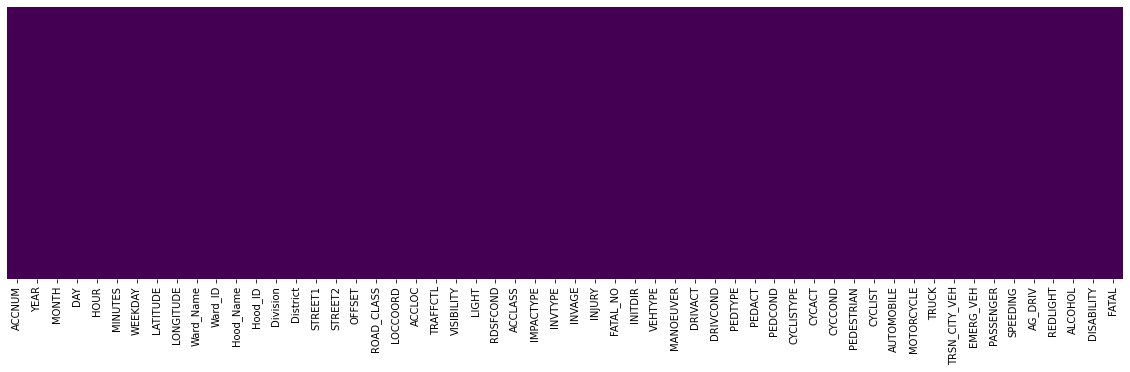

In [7]:
# At first glance the data appears to be very clean
plt.figure(figsize=(20,5))
sns.heatmap(data.isna(), cbar=False, cmap='viridis', yticklabels=False)


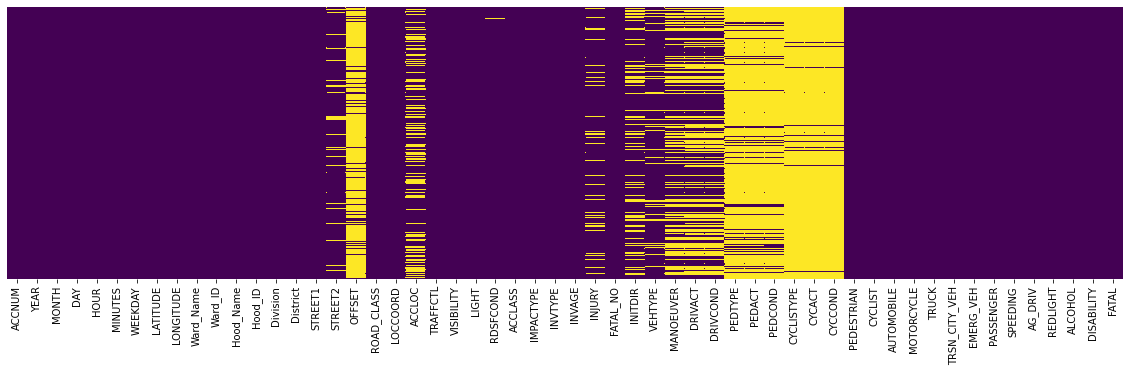

In [8]:
#After trying numerous times to try and figure out the blanks values in the database, they've been setup as ' ' strings
plt.figure(figsize=(20,5))
sns.heatmap(data.eq(' '), cbar=False, cmap='viridis', yticklabels=False)

# Clean Data

In [9]:
# Drop superfluous columns - some with irrelevant data, some with duplicate information (such as "FATAL_NO")
data = data.drop(['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTES', 'LATITUDE', 'LONGITUDE', 'Ward_Name', 'Hood_Name', 'Division', 'District', 'STREET1', 'STREET2', 'OFFSET', 'INITDIR', 'ACCLASS', 'FATAL_NO'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ACCNUM         12557 non-null  int64 
 1   WEEKDAY        12557 non-null  int64 
 2   Ward_ID        12557 non-null  int64 
 3   Hood_ID        12557 non-null  int64 
 4   ROAD_CLASS     12557 non-null  object
 5   LOCCOORD       12557 non-null  object
 6   ACCLOC         12557 non-null  object
 7   TRAFFCTL       12557 non-null  object
 8   VISIBILITY     12557 non-null  object
 9   LIGHT          12557 non-null  object
 10  RDSFCOND       12557 non-null  object
 11  IMPACTYPE      12557 non-null  object
 12  INVTYPE        12557 non-null  object
 13  INVAGE         12557 non-null  object
 14  INJURY         12557 non-null  object
 15  VEHTYPE        12557 non-null  object
 16  MANOEUVER      12557 non-null  object
 17  DRIVACT        12557 non-null  object
 18  DRIVCOND       12557 non-n

In [10]:
for column_name in ['FATAL','DISABILITY', 'ALCOHOL', 'REDLIGHT', 
                    'AG_DRIV', 'SPEEDING', 'PASSENGER', 'EMERG_VEH', 
                    'TRSN_CITY_VEH', 'TRUCK', 'MOTORCYCLE', 'AUTOMOBILE', 
                    'CYCLIST', 'PEDESTRIAN']:
    data[column_name] = data[column_name].astype('int64')

In [11]:
# Clean ROAD_CLASS column (which type of road the drivers were on) was setup as an ordinal feature
data['ROAD_CLASS'] = data['ROAD_CLASS'].replace(to_replace=['Minor Arterial', 'Laneway', 'Local'], value=0, inplace=False, limit=None, regex=False, method='pad')
data['ROAD_CLASS'] = data['ROAD_CLASS'].replace(to_replace=['Major Arterial', 'Major Arterial Ramp'], value=1, inplace=False, limit=None, regex=False, method='pad')
data['ROAD_CLASS'] = data['ROAD_CLASS'].replace(to_replace=['Collector', 'Expressway', 'Expressway Ramp'], value=2, inplace=False, limit=None, regex=False, method='pad')

In [12]:
# Clean VISIBILITY column (the weather conditions surrounding the accident) was setup as an ordinal feature
original_data = data['VISIBILITY'].value_counts()
data['VISIBILITY'] = data['VISIBILITY'].replace(to_replace=['Clear', 'Other', ' '], value=0, inplace=False, limit=None, regex=False, method='pad')
data['VISIBILITY'] = data['VISIBILITY'].replace(to_replace=['Rain', 'Strong wind', 'Fog, Mist, Smoke, Dust'], value=1, inplace=False, limit=None, regex=False, method='pad')
data['VISIBILITY'] = data['VISIBILITY'].replace(to_replace=['Snow', 'Freezing Rain', 'Drifting Snow'], value=2, inplace=False, limit=None, regex=False, method='pad')

In [13]:
# Clean LIGHT column (the amount of light present at the time of accident) was setup as an ordinal feature, Dusk and Dawn were merged due to similar lighting
data['LIGHT'] = data['LIGHT'].replace(to_replace=['Daylight', 'Daylight, artificial', ' ', 'Other'], value=0, inplace=False, limit=None, regex=False, method='pad')
data['LIGHT'] = data['LIGHT'].replace(to_replace=['Dusk', 'Dusk, artificial', 'Dawn', 'Dawn, artificial'], value=1, inplace=False, limit=None, regex=False, method='pad')
data['LIGHT'] = data['LIGHT'].replace(to_replace=['Dark', 'Dark, artificial'], value=2, inplace=False, limit=None, regex=False, method='pad')

In [14]:
# Clean RDSFCOND column (the road surface condition) was setup as an ordinal feature
data['RDSFCOND'] = data['RDSFCOND'].replace(to_replace=['Dry', ' '], value=0, inplace=False, limit=None, regex=False, method='pad')
data['RDSFCOND'] = data['RDSFCOND'].replace(to_replace=['Wet', 'Other', 'Loose Sand or Gravel', 'Loose Snow'], value=1, inplace=False, limit=None, regex=False, method='pad')
data['RDSFCOND'] = data['RDSFCOND'].replace(to_replace=['Slush', 'Ice', 'Packed Snow', 'Spilled liquid'], value=2, inplace=False, limit=None, regex=False, method='pad')

In [15]:
# Clean INVAGE column (age of involved party) was setup as an ordinal feature
# setup ordinal list, and average filled unknown values
data['INVAGE'] = data['INVAGE'].replace(to_replace=['0 to 4'], value=0, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['5 to 9'], value=1, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['10 to 14'], value=2, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['15 to 19'], value=3, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['20 to 24'], value=4, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['25 to 29'], value=5, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['30 to 34'], value=6, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['35 to 39'], value=7, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['40 to 44'], value=8, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['45 to 49'], value=9, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['50 to 54'], value=10, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['55 to 59'], value=11, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['60 to 64'], value=12, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['65 to 69'], value=13, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['70 to 74'], value=14, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['75 to 79'], value=15, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['80 to 84'], value=16, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['85 to 89'], value=17, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['90 to 94'], value=18, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['Over 95'], value=19, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['unknown'], value=7, inplace=False, limit=None, regex=False, method='pad')

In [16]:
# Clean INVAGE column (age of involved party) was setup as an ordinal feature
# setup ordinal list, and average filled unknown values
data['INVAGE'] = data['INVAGE'].replace(to_replace=['0 to 4'], value=0, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['5 to 9'], value=0, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['10 to 14'], value=1, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['15 to 19'], value=1, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['20 to 24'], value=2, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['25 to 29'], value=2, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['30 to 34'], value=3, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['35 to 39'], value=3, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['40 to 44'], value=4, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['45 to 49'], value=4, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['50 to 54'], value=5, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['55 to 59'], value=5, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['60 to 64'], value=6, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['65 to 69'], value=6, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['70 to 74'], value=7, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['75 to 79'], value=7, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['80 to 84'], value=8, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['85 to 89'], value=8, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['90 to 94'], value=9, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['Over 95'], value=9, inplace=False, limit=None, regex=False, method='pad')
data['INVAGE'] = data['INVAGE'].replace(to_replace=['unknown'], value=2, inplace=False, limit=None, regex=False, method='pad')

In [17]:
# Clean INJURY column (severity of injury)
# It appears that the injury code left blank means no injury, or the party is on the police report but indirectly involved in the accident so left blank
data.loc[data['INJURY'] == ' ']

,ACCNUM,WEEKDAY,Ward_ID,Hood_ID,ROAD_CLASS,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,INVAGE,INJURY,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
3,1311542,6,40,118,1,Intersection,,No Control,0,2,0,Pedestrian Collisions,Vehicle Owner,7,,Other,,,,,,,,,,1,0,1,0,0,0,0,1,1,1,0,0,0,0
16,1040168,6,15,31,1,Mid-Block,At Intersection,No Control,0,2,0,Sideswipe,Vehicle Owner,7,,Other,,,,,,,,,,0,0,1,0,0,0,0,0,0,0,0,1,0,0
19,1040168,6,15,31,1,Mid-Block,At Intersection,No Control,0,2,0,Sideswipe,Other Property Owner,7,,Other,,,,,,,,,,0,0,1,0,0,0,0,0,0,0,0,1,0,0
38,1034552,0,1,1,1,Intersection,,Traffic Signal,0,2,0,Rear End,Vehicle Owner,7,,Other,,,,,,,,,,0,0,1,0,0,0,0,1,0,1,0,0,0,0
56,1176855,0,19,82,1,Intersection,At Intersection,Traffic Signal,0,2,0,SMV Other,Vehicle Owner,7,,Other,,,,,,,,,,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,1075399,4,11,113,1,Mid-Block,,No Control,0,0,0,Rear End,Vehicle Owner,7,,Other,,,,,,,,,,0,0,1,0,0,0,0,0,0,1,0,0,0,0
12513,1075399,4,11,113,1,Mid-Block,,No Control,0,0,0,Rear End,Vehicle Owner,7,,Other,,,,,,,,,,0,0,1,0,0,0,0,0,0,1,0,0,0,0
12526,1199427,5,28,73,1,Intersection,At Intersection,Traffic Signal,0,0,0,Angle,Vehicle Owner,7,,Other,,,,,,,,,,0,0,1,1,0,0,0,0,0,1,1,0,0,0
12528,1258512,1,27,75,1,Intersection,,No Control,0,0,0,Rear End,Vehicle Owner,7,,Other,,,,,,,,,,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [18]:
# Injury will be our label, with ' ' values set to no injury
data['INJURY'] = data['INJURY'].replace(to_replace=['None', ' '], value=0, inplace=False, limit=None, regex=False, method='pad')
data['INJURY'] = data['INJURY'].replace(to_replace=['Minimal', 'Minor'], value=1, inplace=False, limit=None, regex=False, method='pad')
data['INJURY'] = data['INJURY'].replace(to_replace=['Major'], value=2, inplace=False, limit=None, regex=False, method='pad')
data['INJURY'] = data['INJURY'].replace(to_replace=['Fatal'], value=3, inplace=False, limit=None, regex=False, method='pad')

In [19]:
# Clean VEHTYPE column - the type of vehicle involved.
# As we can see, pedestrian collisions have an other classifier very frequently.  However, it's also been tied to vehicle owners making this a difficult feature to clean
# As other is such a large category, I will not be changing this into an ordinal set as we lack the domain knowledge, and instead categorize using get_dummies.  
# So we ended up grouping vehicle classes, leaving 'other' as it's own category, and leaving ' ' as it's own category 
data['VEHTYPE'].value_counts()

Automobile, Station Wagon           5140
Other                               4029
                                    1707
Bicycle                              537
Motorcycle                           416
Municipal Transit Bus (TTC)          199
Truck - Open                         150
Pick Up Truck                         88
Passenger Van                         74
Delivery Van                          35
Truck - Closed (Blazer, etc)          31
Street Car                            24
Taxi                                  22
Truck - Dump                          22
Truck-Tractor                         20
Moped                                 19
Bus (Other) (Go Bus, Gray Coach)      11
Truck (other)                          7
Intercity Bus                          7
Tow Truck                              4
Truck - Tank                           4
Police Vehicle                         3
School Bus                             2
Construction Equipment                 2
Other Emergency 

In [20]:
data.loc[data['VEHTYPE'] == 'Other']

,ACCNUM,WEEKDAY,Ward_ID,Hood_ID,ROAD_CLASS,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,INVAGE,INJURY,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL
1,1311542,6,40,118,1,Intersection,,No Control,0,2,0,Pedestrian Collisions,Passenger,5,1,Other,,,,,,,,,,1,0,1,0,0,0,0,1,1,1,0,0,0,0
3,1311542,6,40,118,1,Intersection,,No Control,0,2,0,Pedestrian Collisions,Vehicle Owner,7,0,Other,,,,,,,,,,1,0,1,0,0,0,0,1,1,1,0,0,0,0
5,1311542,6,40,118,1,Intersection,,No Control,0,2,0,Pedestrian Collisions,Pedestrian,13,2,Other,,,,Pedestrian hit at mid-block,"Crossing, no Traffic Control",Normal,,,,1,0,1,0,0,0,0,1,1,1,0,0,0,0
9,1095752,3,32,65,0,Intersection,,Traffic Signal,0,2,0,Pedestrian Collisions,Pedestrian,5,2,Other,Other,,,Vehicle turns left while ped crosses with ROW ...,Crossing with right of way,Normal,,,,1,0,1,0,0,0,0,0,0,1,0,0,0,0
16,1040168,6,15,31,1,Mid-Block,At Intersection,No Control,0,2,0,Sideswipe,Vehicle Owner,7,0,Other,,,,,,,,,,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12531,1293088,6,5,14,1,Intersection,At Intersection,No Control,0,0,0,Rear End,Vehicle Owner,7,0,Other,,,,,,,,,,0,0,1,1,0,0,0,0,1,1,0,0,0,0
12537,1329416,1,5,14,0,Intersection,At Intersection,No Control,0,2,1,Pedestrian Collisions,Pedestrian,11,2,Other,,,,Vehicle is going straight thru inter.while ped...,"Crossing, no Traffic Control",Unknown,,,,1,0,1,0,0,0,0,0,0,0,0,0,0,0
12551,1204889,1,37,119,1,Intersection,At Intersection,Traffic Signal,1,2,1,Pedestrian Collisions,Pedestrian,16,2,Other,,,,Vehicle is going straight thru inter.while ped...,Crossing without right of way,Normal,,,,1,0,1,0,0,0,0,0,0,0,0,0,0,0
12553,1291534,4,28,73,0,Intersection,,No Control,0,0,0,Pedestrian Collisions,Other,7,0,Other,Parked,,,,,,,,,1,0,0,1,0,0,0,0,1,1,0,0,0,0


In [21]:
#Grouping small categories together by weight class/vehicle type and setup as an ordinal feature
data['VEHTYPE'] = data['VEHTYPE'].replace(to_replace=[' '], value='NA', inplace=False, limit=None, regex=False, method='pad')
data['VEHTYPE'] = data['VEHTYPE'].replace(to_replace=['Municipal Transit Bus (TTC)', 'Truck - Open', 'Delivery Van', 'Street Car', 'Truck - Dump', 'Truck-Tractor', 'Bus (Other) (Go Bus, Gray Coach)', 'Truck (other)', 'Intercity Bus', 'Truck - Tank', 'School Bus', 'Construction Equipment', 'Truck - Car Carrier', 'Fire Vehicle', 'Other Emergency Vehicle'], value='Heavy Commercial', inplace=False, limit=None, regex=False, method='pad')
data['VEHTYPE'] = data['VEHTYPE'].replace(to_replace=['Off Road - 2 Wheels', 'Moped'], value='Motorcycle', inplace=False, limit=None, regex=False, method='pad')
data['VEHTYPE'] = data['VEHTYPE'].replace(to_replace=['Pick Up Truck', 'Passenger Van', 'Truck - Closed (Blazer, etc)', 'Tow Truck'], value='Large Auto', inplace=False, limit=None, regex=False, method='pad')
data['VEHTYPE'] = data['VEHTYPE'].replace(to_replace=['Taxi', 'Police Vehicle'], value='Automobile, Station Wagon', inplace=False, limit=None, regex=False, method='pad')

In [22]:
# Clean INVTYPE column - the involvement of the person in the row of the database
# Grouping small categories together by weight class/vehicle type
data['INVTYPE'] = data['INVTYPE'].replace(to_replace=['Moped Driver'], value='Motorcycle Driver', inplace=False, limit=None, regex=False, method='pad')
data['INVTYPE'] = data['INVTYPE'].replace(to_replace=['Motorcycle Passenger'], value='Motorcycle Driver', inplace=False, limit=None, regex=False, method='pad')
data['INVTYPE'] = data['INVTYPE'].replace(to_replace=['Wheelchair', 'In-Line Skater'], value='Pedestrian', inplace=False, limit=None, regex=False, method='pad')
data['INVTYPE'] = data['INVTYPE'].replace(to_replace=[' ', 'Other Property Owner', 'Driver - Not Hit', 'a', 'Runaway - No Driver', 'Unknown - FTR', 'Pedestrian - Not Hit', 'Witness'], value='Other', inplace=False, limit=None, regex=False, method='pad')
data['INVTYPE'] = data['INVTYPE'].replace(to_replace=['Trailer Owner'], value='Vehicle Owner', inplace=False, limit=None, regex=False, method='pad')

In [23]:
#Ordinal features and our label has now been setup, now we need to one hot encode all our categorical features

In [24]:
# Clean LOCCORD - Location Coordinates of accident
data['LOCCOORD'] = data['LOCCOORD'].replace(to_replace=[' ', 'Park, Private Property, Public Lane', 'Entrance Ramp Westbound'], value='Other', inplace=False, limit=None, regex=False, method='pad')
data1 = pd.get_dummies(data[['LOCCOORD']])
data = pd.concat([data,data1], axis=1)
data.drop('LOCCOORD', axis=1, inplace=True)

In [25]:
# Clean ACCLOC - the accident location
data['ACCLOC'] = data['ACCLOC'].replace(to_replace=[' '], value='Other', inplace=False, limit=None, regex=False, method='pad')
data1 = pd.get_dummies(data[['ACCLOC']])
data = pd.concat([data,data1], axis=1)
data.drop('ACCLOC', axis=1, inplace=True)

In [26]:
# Clean TRAFFCTL - the type of traffic control present
data1 = pd.get_dummies(data[['TRAFFCTL']])
data = pd.concat([data,data1], axis=1)
data.drop('TRAFFCTL', axis=1, inplace=True)

In [27]:
# Clean IMPACTYPE - the type of impact
data1 = pd.get_dummies(data[['IMPACTYPE']])
data = pd.concat([data,data1], axis=1)
data.drop('IMPACTYPE', axis=1, inplace=True)

In [28]:
# get_dummies for various columns
data1 = pd.get_dummies(data[['INVTYPE']])
data = pd.concat([data,data1], axis=1)
data.drop('INVTYPE', axis=1, inplace=True)

data1 = pd.get_dummies(data[['VEHTYPE']])
data = pd.concat([data,data1], axis=1)
data.drop('VEHTYPE', axis=1, inplace=True)

data1 = pd.get_dummies(data[['MANOEUVER']])
data = pd.concat([data,data1], axis=1)
data.drop('MANOEUVER', axis=1, inplace=True)

data1 = pd.get_dummies(data[['DRIVACT']])
data = pd.concat([data,data1], axis=1)
data.drop('DRIVACT', axis=1, inplace=True)

data1 = pd.get_dummies(data[['DRIVCOND']])
data = pd.concat([data,data1], axis=1)
data.drop('DRIVCOND', axis=1, inplace=True)

data1 = pd.get_dummies(data[['PEDTYPE']])
data = pd.concat([data,data1], axis=1)
data.drop('PEDTYPE', axis=1, inplace=True)

data1 = pd.get_dummies(data[['PEDACT']])
data = pd.concat([data,data1], axis=1)
data.drop('PEDACT', axis=1, inplace=True)

data1 = pd.get_dummies(data[['PEDCOND']])
data = pd.concat([data,data1], axis=1)
data.drop('PEDCOND', axis=1, inplace=True)

data1 = pd.get_dummies(data[['CYCLISTYPE']])
data = pd.concat([data,data1], axis=1)
data.drop('CYCLISTYPE', axis=1, inplace=True)

data1 = pd.get_dummies(data[['CYCACT']])
data = pd.concat([data,data1], axis=1)
data.drop('CYCACT', axis=1, inplace=True)

data1 = pd.get_dummies(data[['CYCCOND']])
data = pd.concat([data,data1], axis=1)
data.drop('CYCCOND', axis=1, inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12557 entries, 0 to 12556
Columns: 205 entries, ACCNUM to CYCCOND_Unknown
dtypes: int64(24), uint8(181)
memory usage: 4.5 MB


In [30]:
data.head()

,ACCNUM,WEEKDAY,Ward_ID,Hood_ID,ROAD_CLASS,VISIBILITY,LIGHT,RDSFCOND,INVAGE,INJURY,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL,LOCCOORD_Intersection,LOCCOORD_Mid-Block,LOCCOORD_Other,ACCLOC_At Intersection,ACCLOC_At/Near Private Drive,ACCLOC_Intersection Related,ACCLOC_Laneway,ACCLOC_Non Intersection,ACCLOC_Other,ACCLOC_Overpass or Bridge,ACCLOC_Private Driveway,ACCLOC_Trail,ACCLOC_Underpass or Tunnel,TRAFFCTL_,TRAFFCTL_No Control,TRAFFCTL_Pedestrian Crossover,TRAFFCTL_Police Control,TRAFFCTL_School Guard,TRAFFCTL_Stop Sign,TRAFFCTL_Streetcar (Stop for),TRAFFCTL_Traffic Controller,TRAFFCTL_Traffic Gate,TRAFFCTL_Traffic Signal,TRAFFCTL_Yield Sign,IMPACTYPE_Angle,IMPACTYPE_Approaching,IMPACTYPE_Cyclist Collisions,IMPACTYPE_Other,IMPACTYPE_Pedestrian Collisions,IMPACTYPE_Rear End,IMPACTYPE_SMV Other,IMPACTYPE_SMV Unattended Vehicle,IMPACTYPE_Sideswipe,IMPACTYPE_Turning Movement,INVTYPE_Cyclist,INVTYPE_Driver,INVTYPE_Motorcycle Driver,INVTYPE_Other,INVTYPE_Passenger,INVTYPE_Pedestrian,INVTYPE_Truck Driver,INVTYPE_Vehicle Owner,"VEHTYPE_Automobile, Station Wagon",VEHTYPE_Bicycle,VEHTYPE_Heavy Commercial,VEHTYPE_Large Auto,VEHTYPE_Motorcycle,VEHTYPE_NA,VEHTYPE_Other,MANOEUVER_,MANOEUVER_Changing Lanes,MANOEUVER_Disabled,MANOEUVER_Going Ahead,MANOEUVER_Making U Turn,MANOEUVER_Merging,MANOEUVER_Other,MANOEUVER_Overtaking,MANOEUVER_Parked,MANOEUVER_Pulling Away from Shoulder or Curb,MANOEUVER_Pulling Onto Shoulder or towardCurb,MANOEUVER_Reversing,MANOEUVER_Slowing or Stopping,MANOEUVER_Stopped,MANOEUVER_Turning Left,MANOEUVER_Turning Right,MANOEUVER_Unknown,DRIVACT_,DRIVACT_Disobeyed Traffic Control,DRIVACT_Driving Properly,DRIVACT_Exceeding Speed Limit,DRIVACT_Failed to Yield Right of Way,DRIVACT_Following too Close,DRIVACT_Improper Lane Change,DRIVACT_Improper Passing,DRIVACT_Improper Turn,DRIVACT_Lost control,DRIVACT_Other,DRIVACT_Speed too Fast For Condition,DRIVACT_Speed too Slow,DRIVACT_Wrong Way on One Way Road,DRIVCOND_,"DRIVCOND_Ability Impaired, Alcohol","DRIVCOND_Ability Impaired, Alcohol Over .08","DRIVCOND_Ability Impaired, Drugs",DRIVCOND_Fatigue,DRIVCOND_Had Been Drinking,DRIVCOND_Inattentive,DRIVCOND_Medical or Physical Disability,DRIVCOND_Normal,DRIVCOND_Other,DRIVCOND_Unknown,PEDTYPE_,PEDTYPE_Other / Undefined,PEDTYPE_Pedestrian hit a PXO/ped. Mid-block signal,PEDTYPE_Pedestrian hit at mid-block,PEDTYPE_Pedestrian hit at parking lot,PEDTYPE_Pedestrian hit at private driveway,PEDTYPE_Pedestrian hit on sidewalk or shoulder,PEDTYPE_Pedestrian involved in a collision with transit vehicle anywhere along roadway,PEDTYPE_Unknown,PEDTYPE_Vehicle hits the pedestrian walking or running out from between parked vehicles at mid-block,PEDTYPE_Vehicle is going straight thru inter.while ped cross with ROW,PEDTYPE_Vehicle is going straight thru inter.while ped cross without ROW,PEDTYPE_Vehicle is reversing and hits pedestrian,PEDTYPE_Vehicle turns left while ped crosses with ROW at inter.,PEDTYPE_Vehicle turns left while ped crosses without ROW at inter.,PEDTYPE_Vehicle turns right while ped crosses with ROW at inter.,PEDTYPE_Vehicle turns right while ped crosses without ROW at inter.,PEDACT_,PEDACT_Coming From Behind Parked Vehicle,PEDACT_Crossing marked crosswalk without ROW,PEDACT_Crossing with right of way,PEDACT_Crossing without right of way,"PEDACT_Crossing, Pedestrian Crossover","PEDACT_Crossing, no Traffic Control",PEDACT_On Sidewalk or Shoulder,PEDACT_Other,PEDACT_Person Getting on/off School Bus,PEDACT_Person Getting on/off Vehicle,PEDACT_Playing or Working on Highway,PEDACT_Pushing/Working on Vehicle,PEDACT_Running onto Roadway,PEDACT_Walking on Roadway Against Traffic,PEDACT_Walking on Roadway with Traffic,PEDCOND_,"PEDCOND_Ability Impaired, Alcohol","PEDCOND_Ability Impaired, Alcohol Over .80","PEDCOND_Ability Impaired, Drugs",PEDCOND_Fatigue,PEDCOND_Had Been Drinking,PEDCOND_Inattentive,PEDCOND_Medical or Physical Disability,PEDCOND_

# Data Preprocessing

In [31]:
############### PCA ######################################

In [32]:
from sklearn.decomposition import TruncatedSVD as svd

In [33]:
df = data.iloc[:,24:]

In [34]:
df.head()

,LOCCOORD_Intersection,LOCCOORD_Mid-Block,LOCCOORD_Other,ACCLOC_At Intersection,ACCLOC_At/Near Private Drive,ACCLOC_Intersection Related,ACCLOC_Laneway,ACCLOC_Non Intersection,ACCLOC_Other,ACCLOC_Overpass or Bridge,ACCLOC_Private Driveway,ACCLOC_Trail,ACCLOC_Underpass or Tunnel,TRAFFCTL_,TRAFFCTL_No Control,TRAFFCTL_Pedestrian Crossover,TRAFFCTL_Police Control,TRAFFCTL_School Guard,TRAFFCTL_Stop Sign,TRAFFCTL_Streetcar (Stop for),TRAFFCTL_Traffic Controller,TRAFFCTL_Traffic Gate,TRAFFCTL_Traffic Signal,TRAFFCTL_Yield Sign,IMPACTYPE_Angle,IMPACTYPE_Approaching,IMPACTYPE_Cyclist Collisions,IMPACTYPE_Other,IMPACTYPE_Pedestrian Collisions,IMPACTYPE_Rear End,IMPACTYPE_SMV Other,IMPACTYPE_SMV Unattended Vehicle,IMPACTYPE_Sideswipe,IMPACTYPE_Turning Movement,INVTYPE_Cyclist,INVTYPE_Driver,INVTYPE_Motorcycle Driver,INVTYPE_Other,INVTYPE_Passenger,INVTYPE_Pedestrian,INVTYPE_Truck Driver,INVTYPE_Vehicle Owner,"VEHTYPE_Automobile, Station Wagon",VEHTYPE_Bicycle,VEHTYPE_Heavy Commercial,VEHTYPE_Large Auto,VEHTYPE_Motorcycle,VEHTYPE_NA,VEHTYPE_Other,MANOEUVER_,MANOEUVER_Changing Lanes,MANOEUVER_Disabled,MANOEUVER_Going Ahead,MANOEUVER_Making U Turn,MANOEUVER_Merging,MANOEUVER_Other,MANOEUVER_Overtaking,MANOEUVER_Parked,MANOEUVER_Pulling Away from Shoulder or Curb,MANOEUVER_Pulling Onto Shoulder or towardCurb,MANOEUVER_Reversing,MANOEUVER_Slowing or Stopping,MANOEUVER_Stopped,MANOEUVER_Turning Left,MANOEUVER_Turning Right,MANOEUVER_Unknown,DRIVACT_,DRIVACT_Disobeyed Traffic Control,DRIVACT_Driving Properly,DRIVACT_Exceeding Speed Limit,DRIVACT_Failed to Yield Right of Way,DRIVACT_Following too Close,DRIVACT_Improper Lane Change,DRIVACT_Improper Passing,DRIVACT_Improper Turn,DRIVACT_Lost control,DRIVACT_Other,DRIVACT_Speed too Fast For Condition,DRIVACT_Speed too Slow,DRIVACT_Wrong Way on One Way Road,DRIVCOND_,"DRIVCOND_Ability Impaired, Alcohol","DRIVCOND_Ability Impaired, Alcohol Over .08","DRIVCOND_Ability Impaired, Drugs",DRIVCOND_Fatigue,DRIVCOND_Had Been Drinking,DRIVCOND_Inattentive,DRIVCOND_Medical or Physical Disability,DRIVCOND_Normal,DRIVCOND_Other,DRIVCOND_Unknown,PEDTYPE_,PEDTYPE_Other / Undefined,PEDTYPE_Pedestrian hit a PXO/ped. Mid-block signal,PEDTYPE_Pedestrian hit at mid-block,PEDTYPE_Pedestrian hit at parking lot,PEDTYPE_Pedestrian hit at private driveway,PEDTYPE_Pedestrian hit on sidewalk or shoulder,PEDTYPE_Pedestrian involved in a collision with transit vehicle anywhere along roadway,PEDTYPE_Unknown,PEDTYPE_Vehicle hits the pedestrian walking or running out from between parked vehicles at mid-block,PEDTYPE_Vehicle is going straight thru inter.while ped cross with ROW,PEDTYPE_Vehicle is going straight thru inter.while ped cross without ROW,PEDTYPE_Vehicle is reversing and hits pedestrian,PEDTYPE_Vehicle turns left while ped crosses with ROW at inter.,PEDTYPE_Vehicle turns left while ped crosses without ROW at inter.,PEDTYPE_Vehicle turns right while ped crosses with ROW at inter.,PEDTYPE_Vehicle turns right while ped crosses without ROW at inter.,PEDACT_,PEDACT_Coming From Behind Parked Vehicle,PEDACT_Crossing marked crosswalk without ROW,PEDACT_Crossing with right of way,PEDACT_Crossing without right of way,"PEDACT_Crossing, Pedestrian Crossover","PEDACT_Crossing, no Traffic Control",PEDACT_On Sidewalk or Shoulder,PEDACT_Other,PEDACT_Person Getting on/off School Bus,PEDACT_Person Getting on/off Vehicle,PEDACT_Playing or Working on Highway,PEDACT_Pushing/Working on Vehicle,PEDACT_Running onto Roadway,PEDACT_Walking on Roadway Against Traffic,PEDACT_Walking on Roadway with Traffic,PEDCOND_,"PEDCOND_Ability Impaired, Alcohol","PEDCOND_Ability Impaired, Alcohol Over .80","PEDCOND_Ability Impaired, Drugs",PEDCOND_Fatigue,PEDCOND_Had Been Drinking,PEDCOND_Inattentive,PEDCOND_Medical or Physical Disability,PEDCOND_Normal,PEDCOND_Other,PEDCOND_Unknown,CYCLISTYPE_,CYCLISTYPE_Cyclist and Driver travelling in same direction. One vehicle rear-ended the other.,CYCLISTYPE_Cyclist and Driver travelling in same direction. One vehicle

In [35]:
df.shape

(12557, 181)

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
# define dataset
X = df
y = data.iloc[:,9]
y

0        0
1        1
2        3
3        0
4        0
        ..
12552    2
12553    0
12554    1
12555    3
12556    2
Name: INJURY, Length: 12557, dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression

steps = [('svd', svd), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

>1 0.645 (0.009)
>2 0.648 (0.010)
>3 0.646 (0.009)
>4 0.644 (0.010)
>5 0.651 (0.010)
>6 0.652 (0.009)
>7 0.647 (0.010)
>8 0.648 (0.012)
>9 0.667 (0.011)
>10 0.682 (0.008)
>11 0.691 (0.009)
>12 0.689 (0.009)
>13 0.694 (0.009)
>14 0.708 (0.009)
>15 0.709 (0.008)
>16 0.712 (0.008)
>17 0.710 (0.009)
>18 0.718 (0.009)
>19 0.718 (0.010)


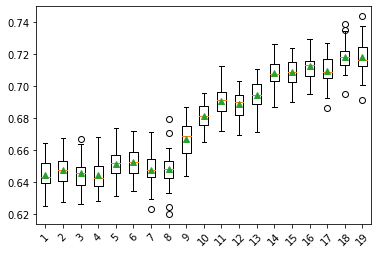

In [39]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot  


def get_models():
	models = dict()
	for i in range(1,20):
		steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [40]:
svd = TruncatedSVD(n_components=18, n_iter=7, random_state=42)
svd.fit(df)
X_svd = svd.transform(X)

In [41]:
print("original shape:   ", X.shape)
print("transformed shape:", X_svd.shape)

original shape:    (12557, 181)
transformed shape: (12557, 18)


In [42]:
a = data.iloc[:,:24]
b = pd.DataFrame(X_svd)

In [43]:
data = pd.concat([a, b], axis=1)

In [44]:
# Split data into X and y
injury_data = data['INJURY']
data = data.drop(columns=['INJURY'])

In [45]:
data.head()

,ACCNUM,WEEKDAY,Ward_ID,Hood_ID,ROAD_CLASS,VISIBILITY,LIGHT,RDSFCOND,INVAGE,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1249781,3,27,76,1,0,2,0,10,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.961986,-1.134520,1.348502,0.664634,0.487049,-0.304959,-0.510041,-0.070547,-0.281211,0.528823,0.456803,0.515934,0.014326,-0.399499,0.038459,0.173376,-0.048859,0.081114
1,1311542,6,40,118,1,0,2,0,5,1,0,1,0,0,0,0,1,1,1,0,0,0,0,3.245525,1.341071,0.588249,-0.370721,-0.255032,-0.412753,0.109388,0.436916,-0.510113,-0.051947,0.733223,-0.143660,-0.158874,-0.485746,-0.546727,-0.103076,-0.312707,-0.341686
2,5002235651,2,30,65,1,0,2,0,12,1,0,1,0,0,0,0,0,0,1,0,0,0,1,2.332077,1.844891,-0.353985,1.376449,0.649414,0.714015,0.188776,0.068668,-0.417705,-0.613750,-0.037441,-0.312819,0.246812,0.046640,-0.145467,-0.020401,-0.000506,0.595768
3,1311542,6,40,118,1,0,2,0,7,1,0,1,0,0,0,0,1,1,1,0,0,0,0,3.234061,1.325912,0.605201,-0.299215,-0.298865,-0.850454,0.177492,-0.010552,-0.582560,0.001150,0.808778,-0.023433,0.092660,0.541584,-0.120603,-0.108332,-0.218615,0.118515
4,1311542,6,40,118,1,0,2,0,12,1,0,1,0,0,0,0,1,1,1,0,0,0,0,3.167489,-1.261412,0.452291,0.695853,0.095090,-0.566982,0.510502,0.431926,-0.460282,-0.181230,0.597549,0.029207,-0.092709,-0.159646,-0.204885,-0.075725,-0.033430,0.069869


## Seletion of Best best features

In [46]:
import numpy as np
import pandas as pd
%matplotlib inline
import scipy.stats as ss
from collections import Counter
import math
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

X = data
feature_names = list(X.columns)
y = injury_data
num_feats = 20

cor_list = cor_support = cor_feature = []
for i in X.columns:
  cor = np.corrcoef(X[i], y)[0, 1]
  cor_list.append(cor)

cor_list = [0 if np.isnan(i) else i for i in cor_list] # replace NaN with 0
cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
cor_support = [True if i in cor_feature else False for i in list(X.columns)]

rfe_support = rfe_feature = []
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=15)
rfe_selector.fit(X_train_minmax, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

embedded_lr_support = embedded_lr_feature = []
lr = LogisticRegression(penalty='l1', solver='liblinear')
embedded_lr_selector = SelectFromModel(lr, max_features=num_feats)
embedded_lr_selector = embedded_lr_selector.fit(X, y)
embedded_lr_support = embedded_lr_selector.get_support()
embedded_lr_feature = X.loc[:, embedded_lr_support].columns.tolist()

embedded_rf_support = embedded_rf_feature = []
sel = SelectFromModel(RandomForestClassifier(n_estimators = 40, bootstrap=False, max_features=num_feats))
sel.fit(X, y)
embedded_rf_feature = X.columns[(sel.get_support())]
embedded_rf_support = sel.get_support()

embedded_lgbm_support = embedded_lgbm_feature = []
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
        reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
embedded_lgbm_selector = SelectFromModel(lgbc, max_features=num_feats)
embedded_lgbm_selector.fit(X, y)
embedded_lgbm_support = embedded_lgbm_selector.get_support()
embedded_lgbm_feature = X.loc[:,embedded_lgbm_support].columns.tolist()

pd.set_option('display.max_rows', None)
feature_selection_df = pd.DataFrame({
    'Feature':feature_names,
    'Pearson':cor_support,
    'RFE':rfe_support,
    'Logistic Regression':embedded_lr_support,
    'Random Forest':embedded_rf_support,
    'LightGBM':embedded_lgbm_support
})
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [47]:
feature_selection_df

,Feature,Pearson,RFE,Logistic Regression,Random Forest,LightGBM,Total
1,13,True,True,True,True,True,5
2,9,True,True,True,True,True,5
3,4,True,True,True,True,True,5
4,3,True,True,True,True,True,5
5,0,True,True,True,True,True,5
6,FATAL,True,True,True,True,False,4
7,17,True,True,True,False,True,4
8,14,True,True,True,False,True,4
9,12,True,True,True,False,True,4
10,10,True,True,True,False,True,4


# Run Random Forest

In [48]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(data, injury_data, 
                                                          stratify = injury_data,
                                                          test_size = 0.3, 
                                                          random_state = RSEED)

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators':[100],
    'max_depth':[10],
    'max_features': ['auto', 'sqrt', None],
    'max_leaf_nodes':[28],
    'min_samples_split': [5],
    'bootstrap': [False]
}

model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt')

cv = RandomizedSearchCV(
    scoring='roc_auc',
    estimator = model,
    param_distributions=parameters,
    cv=3,
    n_iter=10,
    random_state=RSEED
  )

In [50]:
data.head()

,ACCNUM,WEEKDAY,Ward_ID,Hood_ID,ROAD_CLASS,VISIBILITY,LIGHT,RDSFCOND,INVAGE,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,FATAL,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1249781,3,27,76,1,0,2,0,10,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.961986,-1.134520,1.348502,0.664634,0.487049,-0.304959,-0.510041,-0.070547,-0.281211,0.528823,0.456803,0.515934,0.014326,-0.399499,0.038459,0.173376,-0.048859,0.081114
1,1311542,6,40,118,1,0,2,0,5,1,0,1,0,0,0,0,1,1,1,0,0,0,0,3.245525,1.341071,0.588249,-0.370721,-0.255032,-0.412753,0.109388,0.436916,-0.510113,-0.051947,0.733223,-0.143660,-0.158874,-0.485746,-0.546727,-0.103076,-0.312707,-0.341686
2,5002235651,2,30,65,1,0,2,0,12,1,0,1,0,0,0,0,0,0,1,0,0,0,1,2.332077,1.844891,-0.353985,1.376449,0.649414,0.714015,0.188776,0.068668,-0.417705,-0.613750,-0.037441,-0.312819,0.246812,0.046640,-0.145467,-0.020401,-0.000506,0.595768
3,1311542,6,40,118,1,0,2,0,7,1,0,1,0,0,0,0,1,1,1,0,0,0,0,3.234061,1.325912,0.605201,-0.299215,-0.298865,-0.850454,0.177492,-0.010552,-0.582560,0.001150,0.808778,-0.023433,0.092660,0.541584,-0.120603,-0.108332,-0.218615,0.118515
4,1311542,6,40,118,1,0,2,0,12,1,0,1,0,0,0,0,1,1,1,0,0,0,0,3.167489,-1.261412,0.452291,0.695853,0.095090,-0.566982,0.510502,0.431926,-0.460282,-0.181230,0.597549,0.029207,-0.092709,-0.159646,-0.204885,-0.075725,-0.033430,0.069869


In [51]:
clf = RandomForestClassifier(max_depth=10, random_state=RSEED)
clf.fit(train, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [52]:
predictions = clf.predict(test)

Confusion matrix, without normalization
[[1689   61   65    0]
 [ 232  185  105    7]
 [ 215  106  921    4]
 [  23   22   25  108]]


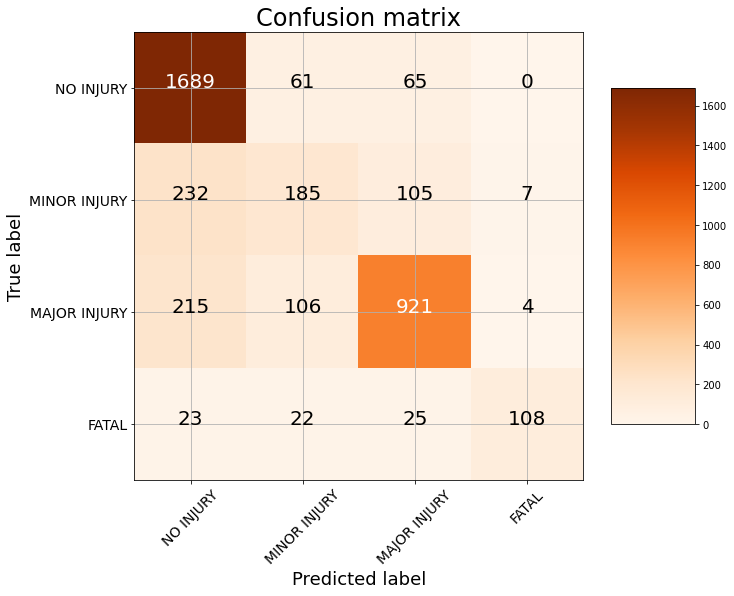

In [53]:
from sklearn.metrics import confusion_matrix
import itertools

#  Helper function to plot Confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, ['NO INJURY', 'MINOR INJURY', 'MAJOR INJURY', 'FATAL'])

In [55]:
clf.score(test, test_labels)

0.7704352441613588